# Checking age x fuel size class dimension

- Pull request: https://github.com/NGEET/fates/pull/711

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [2]:
filename_history_output = 'data/newdim/newdim-test.fates-sci.1.43.1_api.14.1.0-5-g86e8f11c-fates_main_api_14.0.0-C0392347e-F86e8f11c.intel.clm2.h0.2000-01-01-00000.nc' # Test data
data = xr.open_dataset(filename_history_output)

## Check the dimension mapping size

In [3]:
data.FUEL_AMOUNT_AGEFUEL.dims

('time', 'fates_levagefuel', 'lat', 'lon')

In [4]:
data.fates_agmap_levagefuel

<xarray.DataArray 'fates_agmap_levagefuel' (fates_levagefuel: 42)>
array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7], dtype=int32)
Dimensions without coordinates: fates_levagefuel
Attributes:
    long_name:  FATES age-class map into patch age x fuel size
    units:      -

In [5]:
data.fates_fscmap_levagefuel

<xarray.DataArray 'fates_fscmap_levagefuel' (fates_levagefuel: 42)>
array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6], dtype=int32)
Dimensions without coordinates: fates_levagefuel
Attributes:
    long_name:  FATES fuel size-class map into patch age x fuel size
    units:      -

In [6]:
np.max(data.fates_agmap_levagefuel) == data.fates_levage.size

<xarray.DataArray 'fates_agmap_levagefuel' ()>
array(True)

In [7]:
np.max(data.fates_fscmap_levagefuel) == data.fates_levfuel.size

<xarray.DataArray 'fates_fscmap_levagefuel' ()>
array(True)

## Plot the data

In [11]:
fuel_amount_agefuel_unroll = fx.agefuel_to_age_by_fuel(data.FUEL_AMOUNT_AGEFUEL,data)

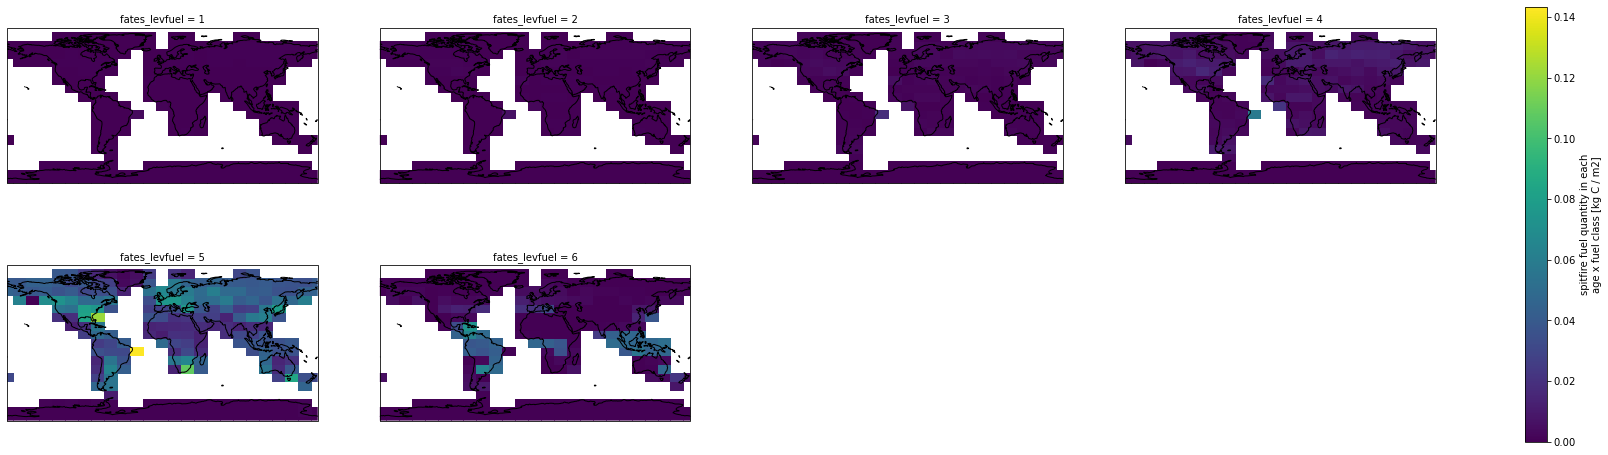

In [12]:
tstop_idx = 364
fuelamount_endyear = fuel_amount_agefuel_unroll.isel(time=tstop_idx)
fg = fuelamount_endyear.isel(fates_levage=0).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 4, figsize=(32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

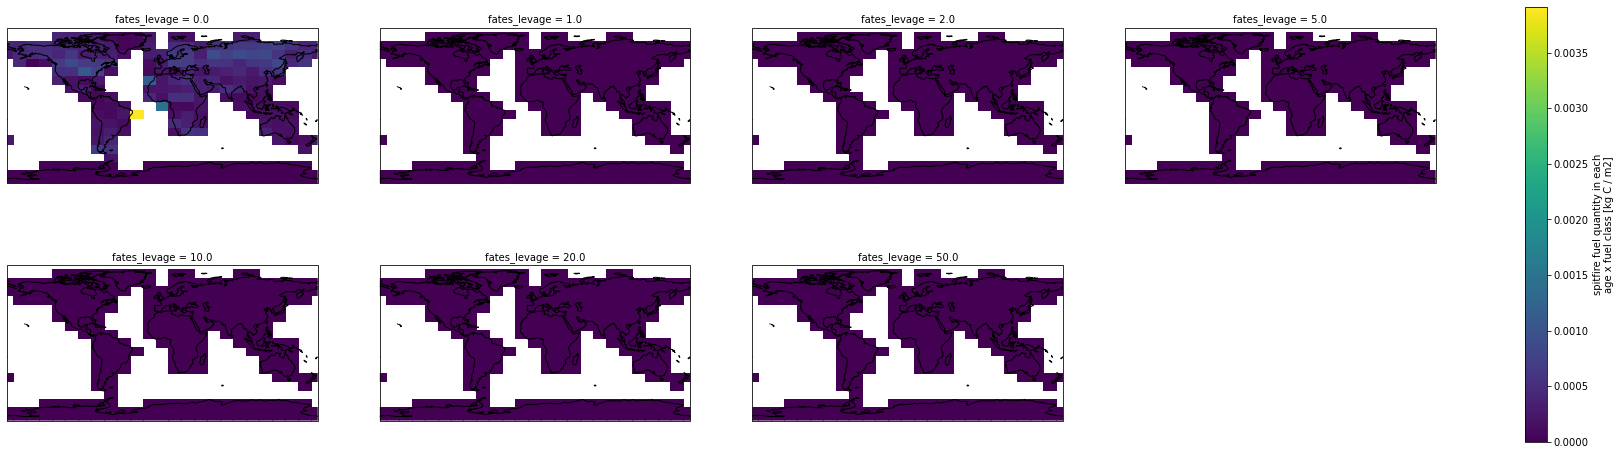

In [21]:
tstop_idx = 364
fuelamount_endyear = fuel_amount_agefuel_unroll.isel(time=tstop_idx)
fg = fuelamount_endyear.isel(fates_levfuel=0).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize=(32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()